# <center>Cars4U Project</center>

### Description:

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

### Premise:

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 



### Objective: 

The objective of this project is to further reinforce and understand the process of importing data, performing preprocessing, performing Exploratory Data Analysis (EDA) and finally build a linear regression model to predict the price of used cars.

### Dataset and Columns:

The dataset we will be using is the Cars4U dataset which is comprised of used cars, their properties, and the price they sold at.

1. S.No. : Serial Number
1. Name : Name of the car which includes Brand name and Model name
1. Location : The location in which the car is being sold or is available for purchase Cities
1. Year : Manufacturing year of the car
1. Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
1. Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
1. Transmission : The type of transmission used by the car. (Automatic / Manual)
1. Owner : Type of ownership
1. Mileage : The standard mileage offered by the car company in kmpl or km/kg
1. Engine : The displacement volume of the engine in CC.
1. Power : The maximum power of the engine in bhp.
1. Seats : The number of seats in the car.
1. New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
1. Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000 rupees)

# 1. Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# 2. Loading and exploring the dataset

In [2]:
df = pd.read_csv(r'C:\Users\ritesh.sirigiri\Downloads\used_cars_data.csv')

#### Observations:
- There are 14 columns and 7,253 rows in the dataset

In [3]:
df.shape

(7253, 14)

#### Observations: 
- There are 3 main datatypes: Int, Float, and Object 
- There are missing values in several columns with 6,247 missing values in the New_Price column. 
- There are several columns with datatype Object that can be modified to a numerical datatype.
- Engine and Power columns show same number of missing values. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


#### Observations: 
- The S.No column is not useful for our analysis and will be dropped. 
- The New_Price column appears to have predominately null values, This column will be dropped.
- Mileage, Engine, and Power column have string elements in them which will have to be removed during preprocessing. The datatype of the columns will then be converted to Float. 
- The Mileage column shows values that either end in "km/kg" or "kmpl". These will need to be converted into a single unit of measurement.

In [5]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [6]:
# The Serial Number column is unncessary for our analysis and was dropped. 
# The New_Price column isn't relevant for our anaylsis and was also dropped as the goal is to build a model to predict used prices. 
df.drop(columns = ["S.No.", "New_Price"], inplace=True)

#### Observations: 
- The Name, Location, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, and New_Price columns are missing. 
- The Price column shows a significant difference between the mean and median.  
- The kilometers_Driven column shows a "used" car with as low as 171 miles in the minimum column. 
- The Seats column shows a minimum value of 0 which logically does not make sense as cars would minimum have one seat.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


#### Observations: 
- Engine and Power column both show the same numbe of missing values. We can possibly make the assumption that the same rows have the same missing data for these two columns.

In [8]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
Price                1234
dtype: int64

# 3. Preprocessing the columns with the correct datatypes

#### Converting Location, Fuel_Type, Transmission, Owner_Type, and Seats columns to categorical columns. 

In [9]:
cols_category = ["Location", "Fuel_Type", "Transmission", "Owner_Type", "Seats"]
df[cols_category] = df[cols_category].astype("category")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   object  
 1   Location           7253 non-null   category
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7251 non-null   object  
 8   Engine             7207 non-null   object  
 9   Power              7207 non-null   object  
 10  Seats              7200 non-null   category
 11  Price              6019 non-null   float64 
dtypes: category(5), float64(1), int64(2), object(4)
memory usage: 433.4+ KB


#### Processing mileage column and converting into numerical column

In [11]:
#There were two units for representing gas mileage. Both are being dropped and the column is being coverted to numeric. 
def mileage_to_num(mileage):
    if isinstance(mileage, str):  
        return float(mileage.replace('km/kg', '').replace('kmpl', ''))
    else: 
        return np.nan

df["Mileage"] = df["Mileage"].apply(mileage_to_num)

In [12]:
df.Mileage.describe()

count    7251.000000
mean       18.141580
std         4.562197
min         0.000000
25%        15.170000
50%        18.160000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64

#### Processing Engine column and converting into numerical column

In [13]:
#Converting Engine column to float
def engine_to_num(engine):
    if isinstance(engine, str):
        return float(engine.replace('CC', ''))
    else:  
        return np.nan

df["Engine"] = df["Engine"].apply(engine_to_num)

In [14]:
df.Engine.describe()

count    7207.000000
mean     1616.573470
std       595.285137
min        72.000000
25%      1198.000000
50%      1493.000000
75%      1968.000000
max      5998.000000
Name: Engine, dtype: float64

#### Processing Power column and converting into numerical column

In [15]:
#Converting Power column to float
def power_to_num(power):
    if isinstance(power, str):
        return float(power.replace('bhp', '').replace("null", "0")) 
        return 
    else: 
        return np.nan

df["Power"] = df["Power"].apply(power_to_num)

df['Power'] = df['Power'].replace(0,df['Power'].median())

In [16]:
df.Power.describe()

count    7207.000000
mean      112.388520
std        53.085969
min        34.200000
25%        76.800000
50%        91.720000
75%       138.030000
max       616.000000
Name: Power, dtype: float64

# 4. Preprocessing the columns to deal with missing values

#### Observations: 
- There are 5 columns with some missing values
- as we will be using the Price column for data analysis, I am opting to drop all null values the Price column instead of filling it with the mean value. 
- I will be filling the Mileage, Engine, Power, and Seats column with their respective mean values. 

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   object  
 1   Location           7253 non-null   category
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7251 non-null   float64 
 8   Engine             7207 non-null   float64 
 9   Power              7207 non-null   float64 
 10  Seats              7200 non-null   category
 11  Price              6019 non-null   float64 
dtypes: category(5), float64(4), int64(2), object(1)
memory usage: 433.4+ KB


##### Filling Mileage, Engine, Power, and Seats columns with their mean values. 

In [18]:
cols_mean = ["Mileage", "Engine", "Power"]
df[cols_mean]=df[cols_mean].fillna(df[cols_mean].median().iloc[0])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   object  
 1   Location           7253 non-null   category
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7253 non-null   float64 
 8   Engine             7253 non-null   float64 
 9   Power              7253 non-null   float64 
 10  Seats              7200 non-null   category
 11  Price              6019 non-null   float64 
dtypes: category(5), float64(4), int64(2), object(1)
memory usage: 433.4+ KB


#### Dropping null values in dataframe

In [20]:
df.dropna(inplace=True)

### Final Observtions after preprocessing: 
- There are 11 unique locations with Mumbai being the top location for car sales.
- The oldest car in the dataset is from 1998 while the newest car is from 2019
- There are used cars with as little as 171 kilometers although there is a max of 6.5 million kilometers (needs further analysis)
- There are 5 unique fuel types with the top fuel type for used cars being Diesel 
- There are 2 unique transmission types with the top transmission type being Manual 
- There are 4 unique owner types wit hthe most common owner being the first owner
- There are 9 unique seat configurations with the most common number of seats being 5 
- The average price for a used car is 9.5 lakhs

In [21]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,5977,1857,Mahindra XUV500 W8 2WD,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,5977,11,Mumbai,785,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,5977,NaN,NaN,NaN,2013.39,3.24702,1998,2012,2014,2016,2019
Kilometers_Driven,5977,NaN,NaN,NaN,58670.4,91543.5,171,33915,53000,73000,6.5e+06
Fuel_Type,5977,5,Diesel,3195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,5977,2,Manual,4266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,5977,4,First,4905,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,5977,NaN,NaN,NaN,18.1794,4.52104,0,15.2,18.16,21.1,33.54
Engine,5977,NaN,NaN,NaN,1621.38,601.275,72,1198,1493,1984,5998
Power,5977,NaN,NaN,NaN,112.887,53.4907,34.2,77,92.7,138.1,560


# 5. Exploratory Data Analysis of columns

## Univariate analysis of numeric variables

#### Observations: 
- Most cars are from the year 2014
- Kilometers column shows significant skew, a log transformation can be performed to address this.
- There is a significant outlier in price that is heavily skewing the data.

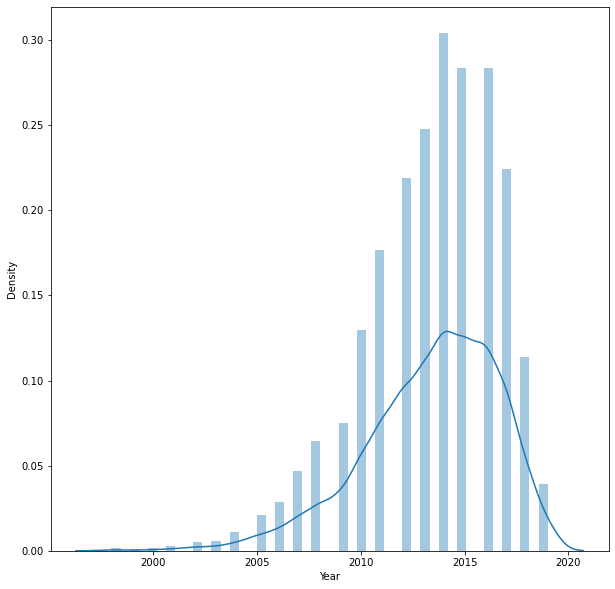

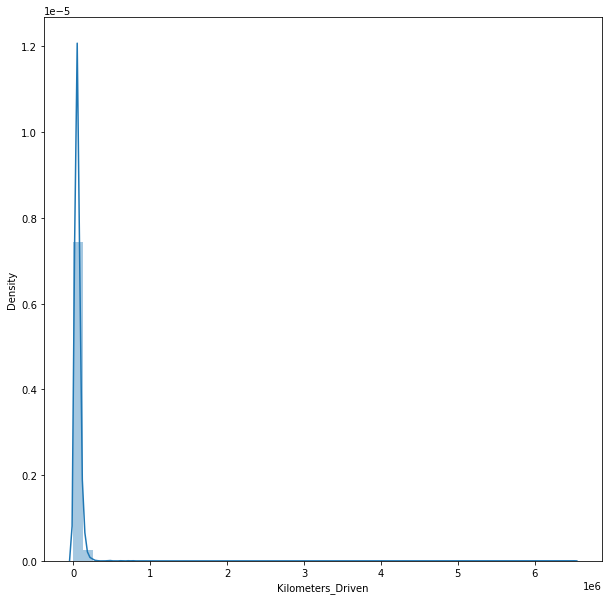

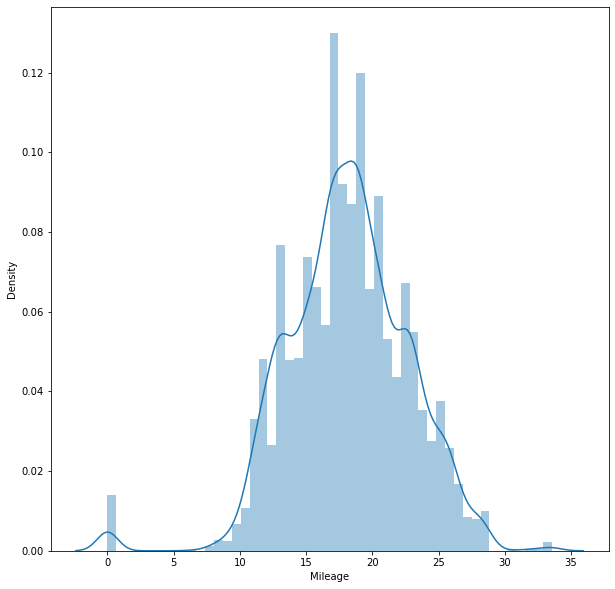

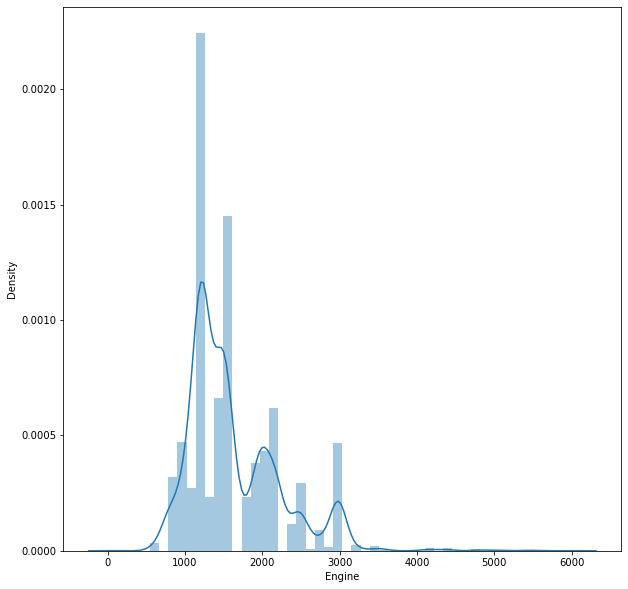

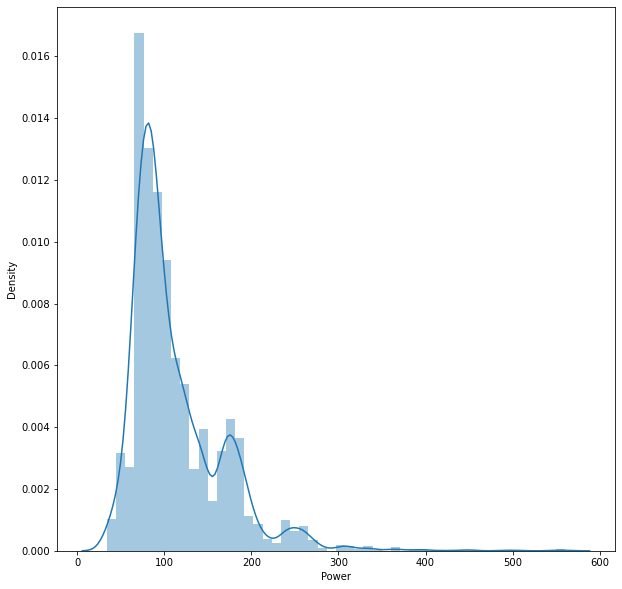

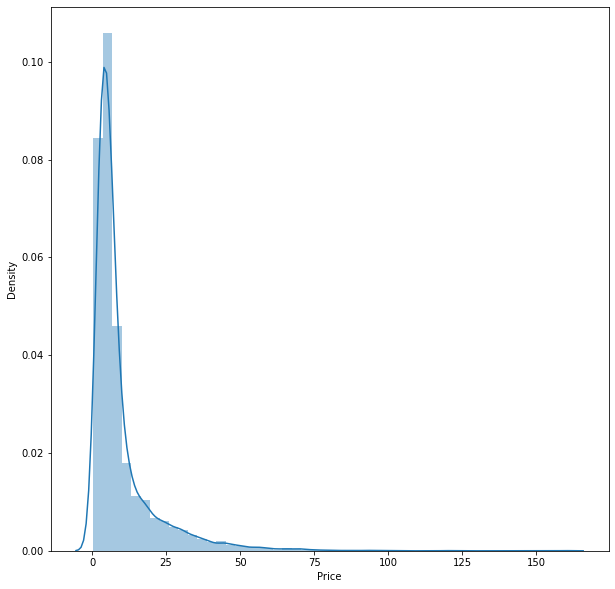

In [22]:
numerical_columns = ["Year", "Kilometers_Driven", "Mileage", "Engine", "Power", "Price"]
for i in df[numerical_columns]:
    plt.figure(figsize = (10,10))
    sns.distplot(df[i])
    plt.show()

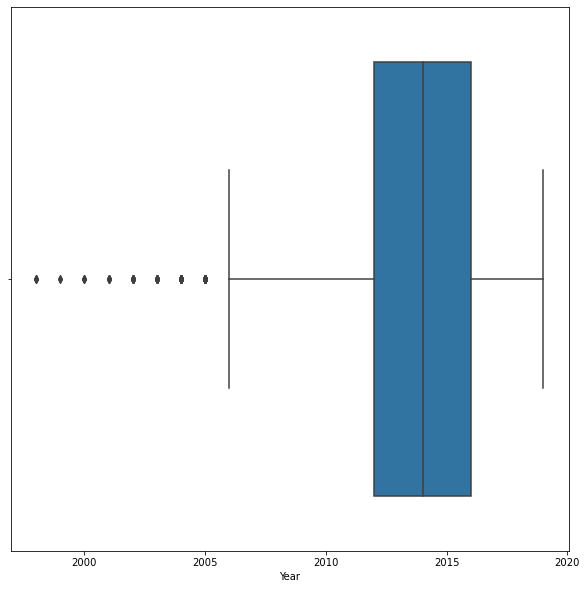

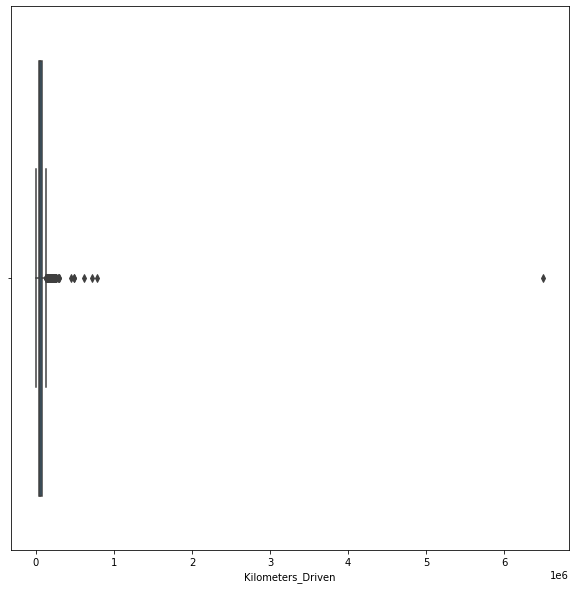

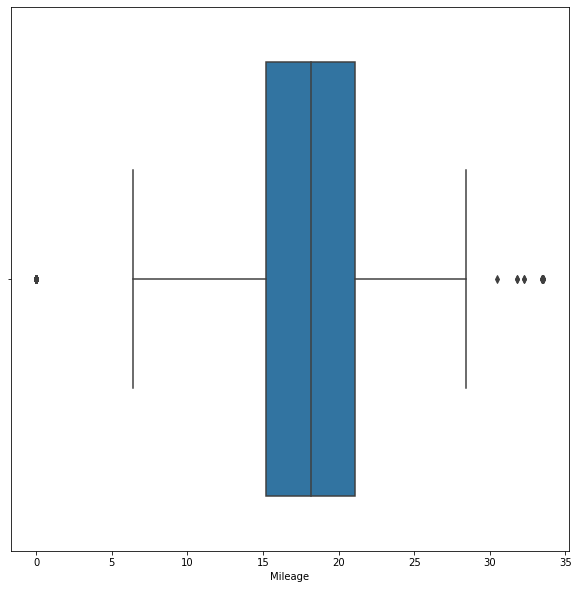

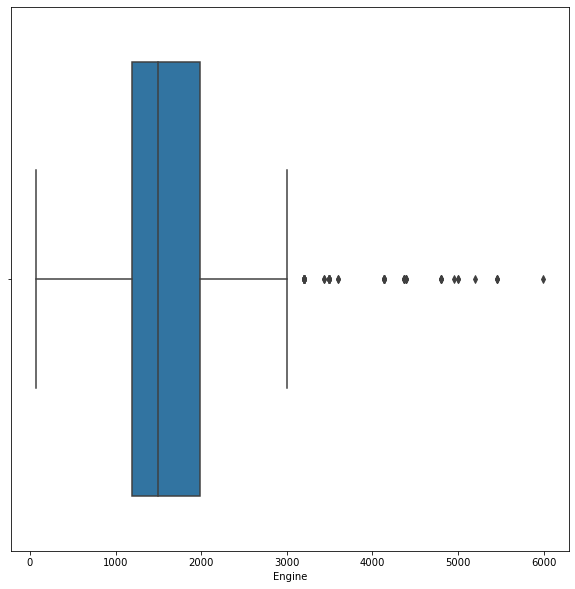

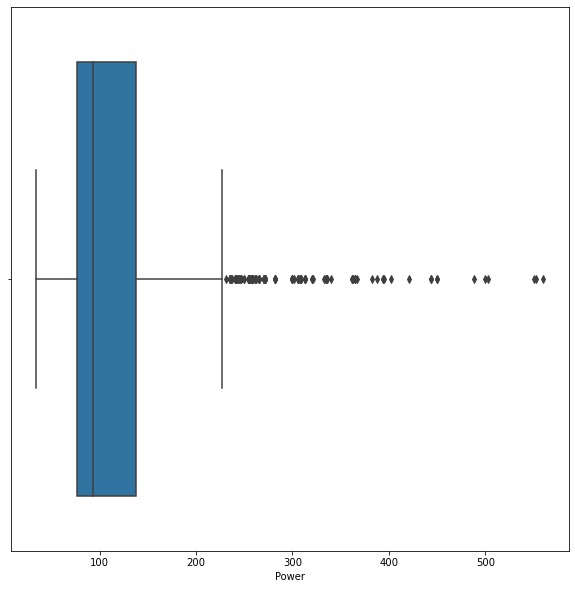

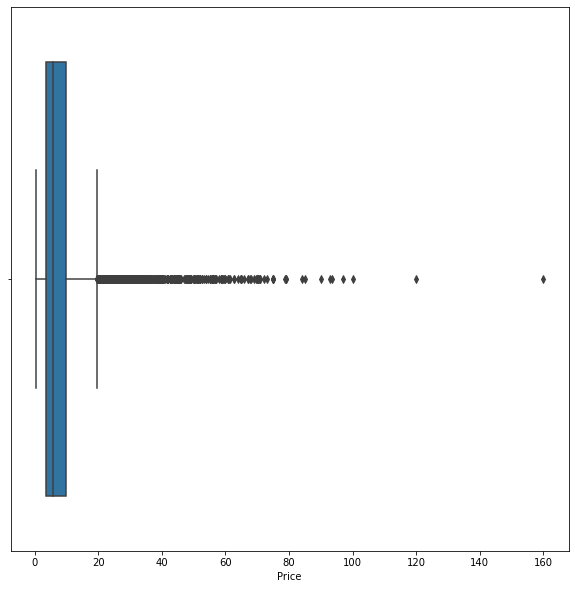

In [23]:
numerical_columns = ["Year", "Kilometers_Driven", "Mileage", "Engine", "Power", "Price"]
for i in df[numerical_columns]:
    plt.figure(figsize = (10,10))
    sns.boxplot(df[i])
    plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5977 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               5977 non-null   object  
 1   Location           5977 non-null   category
 2   Year               5977 non-null   int64   
 3   Kilometers_Driven  5977 non-null   int64   
 4   Fuel_Type          5977 non-null   category
 5   Transmission       5977 non-null   category
 6   Owner_Type         5977 non-null   category
 7   Mileage            5977 non-null   float64 
 8   Engine             5977 non-null   float64 
 9   Power              5977 non-null   float64 
 10  Seats              5977 non-null   category
 11  Price              5977 non-null   float64 
dtypes: category(5), float64(4), int64(2), object(1)
memory usage: 404.0+ KB


## Univariate analysis of categorical variables
#### Observations: 
- Mumbai has the highest number of used cars 
- The most common owner is the first owner 
- Diesel is the largest type of fuel but Petrol isn't too far off. 
- Manual cars are more than twice as available as automatic cars. 
- The most common number of seats is 5. 

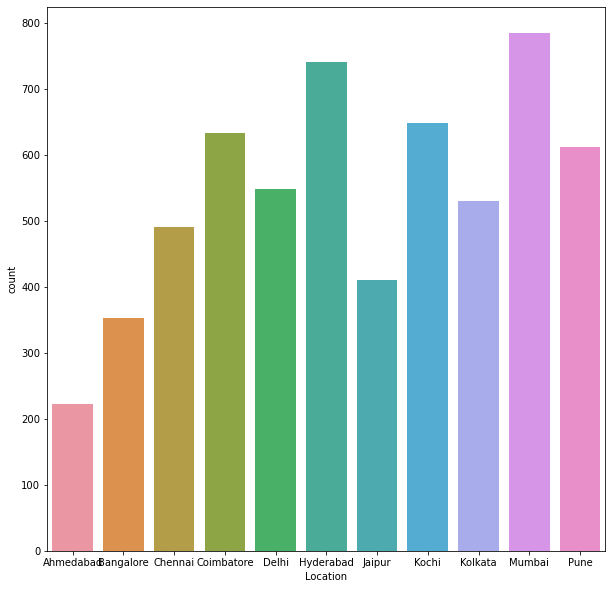

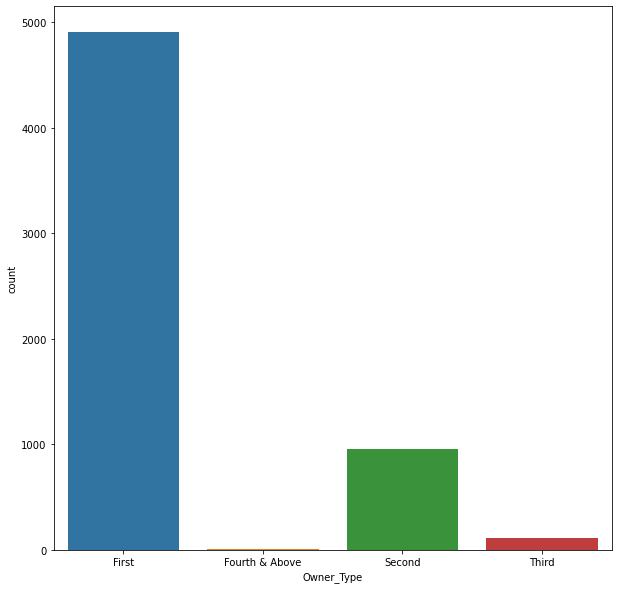

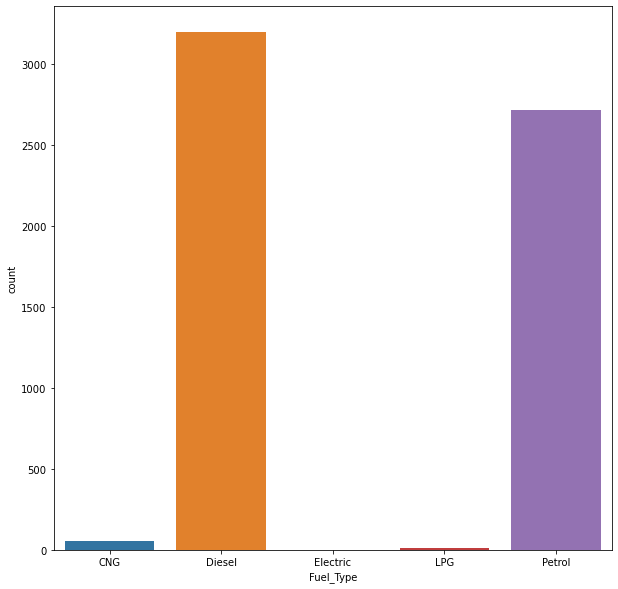

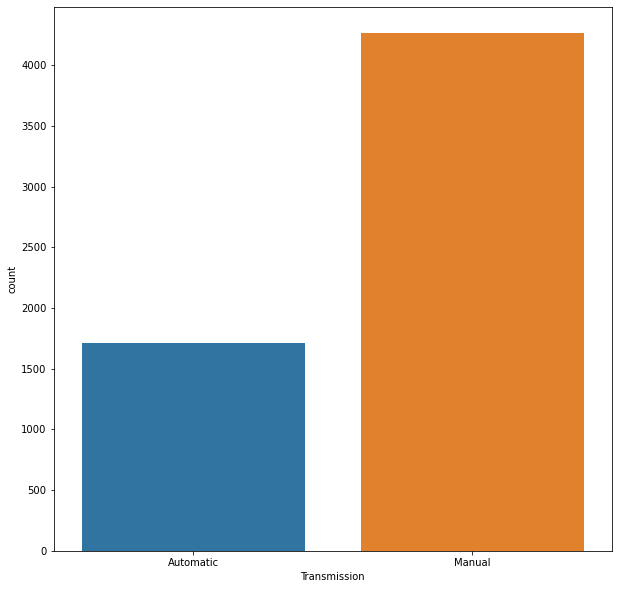

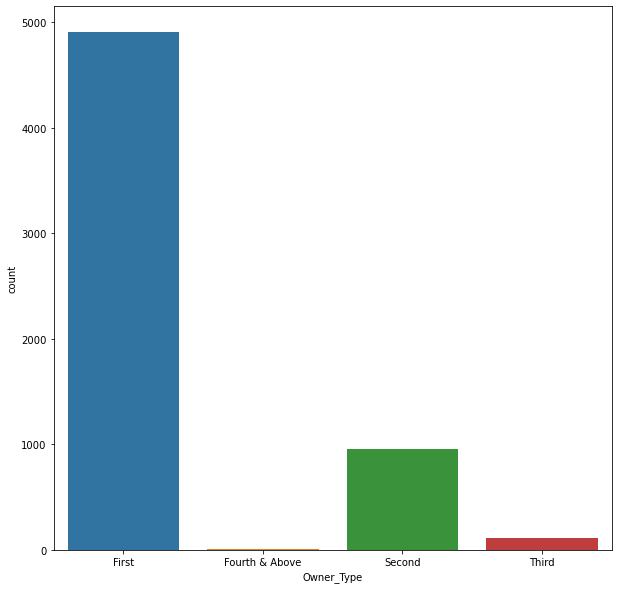

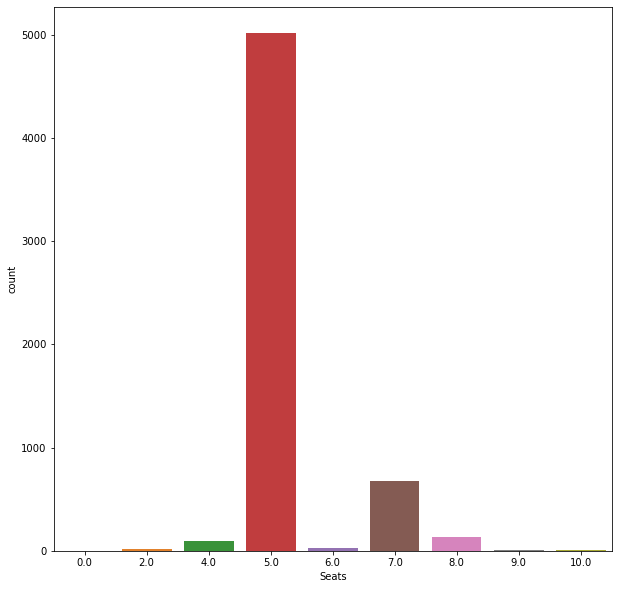

In [25]:
categorical_columns = ["Location", "Owner_Type", "Fuel_Type", "Transmission", "Owner_Type", "Seats"]
for i in df[categorical_columns]:
    plt.figure(figsize = (10,10))
    sns.countplot(df[i])
    plt.show()

## Bivariate analysis
#### Observations: 
- There is a noticeably high correlation between Price and Engine
- There is also a high correlation between Price and Power. 
- The implication here is that a car with a bigger engine fetches a higher price. The same linear correlation applies to power. 

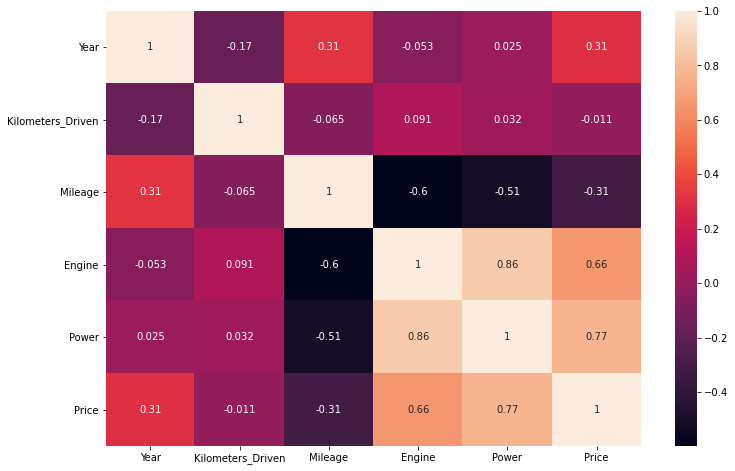

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

# 6. Log Transformation 
- The Kilometers_Driven Engine, and Power column differ greatly in scale compared to the rest of the data and will have a log transformation performed on them. 

In [27]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,5977,1857,Mahindra XUV500 W8 2WD,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,5977,11,Mumbai,785,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,5977,NaN,NaN,NaN,2013.39,3.24702,1998,2012,2014,2016,2019
Kilometers_Driven,5977,NaN,NaN,NaN,58670.4,91543.5,171,33915,53000,73000,6.5e+06
Fuel_Type,5977,5,Diesel,3195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,5977,2,Manual,4266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,5977,4,First,4905,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,5977,NaN,NaN,NaN,18.1794,4.52104,0,15.2,18.16,21.1,33.54
Engine,5977,NaN,NaN,NaN,1621.38,601.275,72,1198,1493,1984,5998
Power,5977,NaN,NaN,NaN,112.887,53.4907,34.2,77,92.7,138.1,560


In [28]:
log_columns = ["Kilometers_Driven", "Engine", "Power"]
for i in df[log_columns]:
    df[i] = np.log(df[i])

In [29]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,5977,1857,Mahindra XUV500 W8 2WD,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,5977,11,Mumbai,785,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,5977,NaN,NaN,NaN,2013.39,3.24702,1998,2012,2014,2016,2019
Kilometers_Driven,5977,NaN,NaN,NaN,10.7569,0.716852,5.14166,10.4316,10.878,11.1982,15.6873
Fuel_Type,5977,5,Diesel,3195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,5977,2,Manual,4266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,5977,4,First,4905,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,5977,NaN,NaN,NaN,18.1794,4.52104,0,15.2,18.16,21.1,33.54
Engine,5977,NaN,NaN,NaN,7.33094,0.340256,4.27667,7.08841,7.30854,7.59287,8.69918
Power,5977,NaN,NaN,NaN,4.6355,0.41321,3.53223,4.34381,4.52937,4.92798,6.32794


-When compared to the charts above, we can see that the data is much more normalized and shows significantly less skew. 

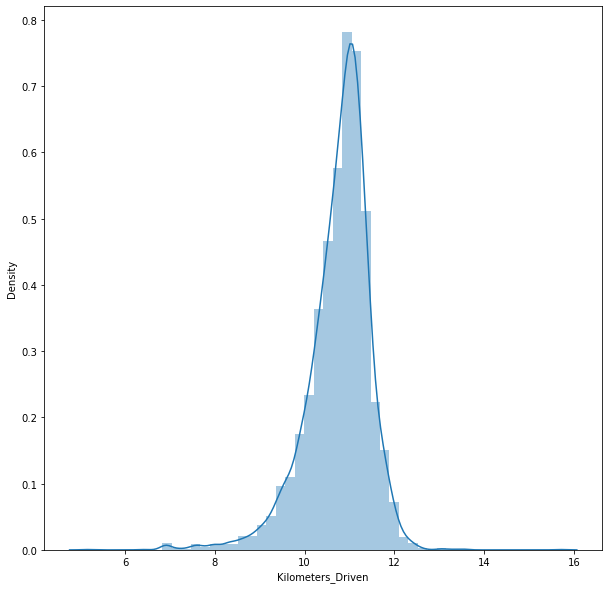

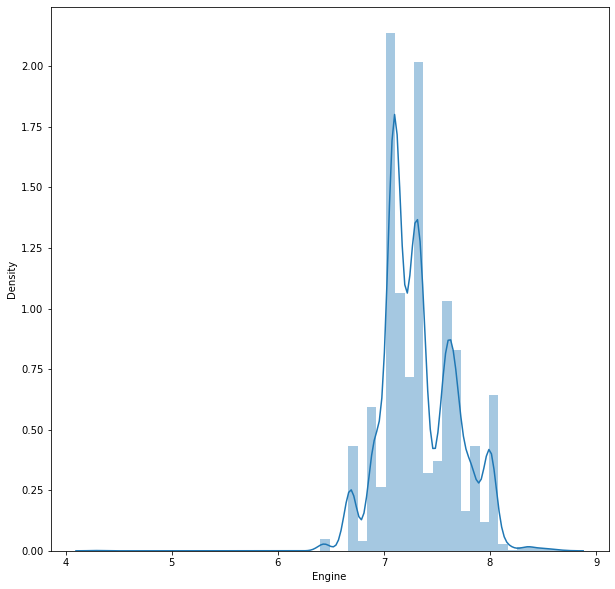

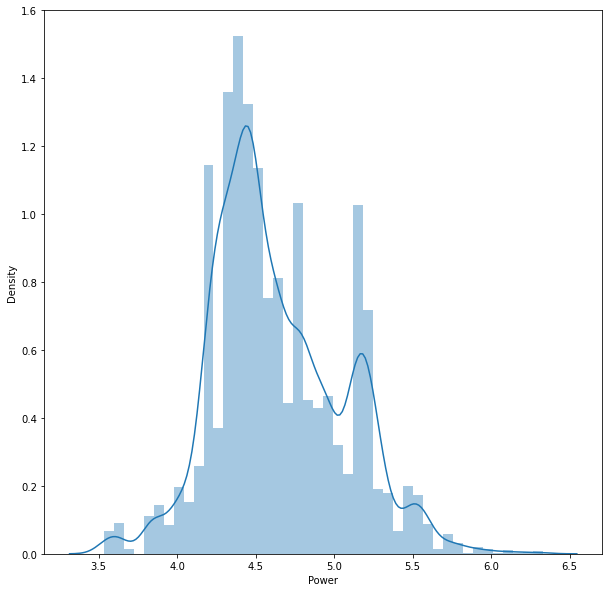

In [30]:
numerical_columns = ["Kilometers_Driven", "Engine", "Power"]
for i in df[numerical_columns]:
    plt.figure(figsize = (10,10))
    sns.distplot(df[i])
    plt.show()

# 7. Outlier Treatment
- The Price column shows a significant outlier at 160 lakhs. I believe this data point can be removed while the other outliers can be preserved and optimized during model building. 


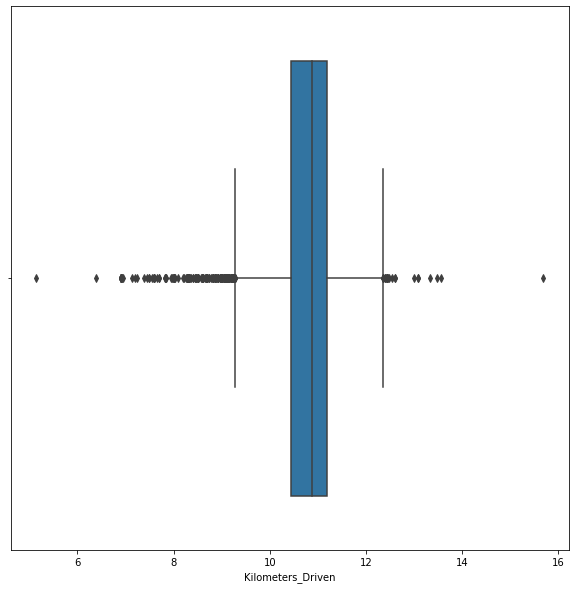

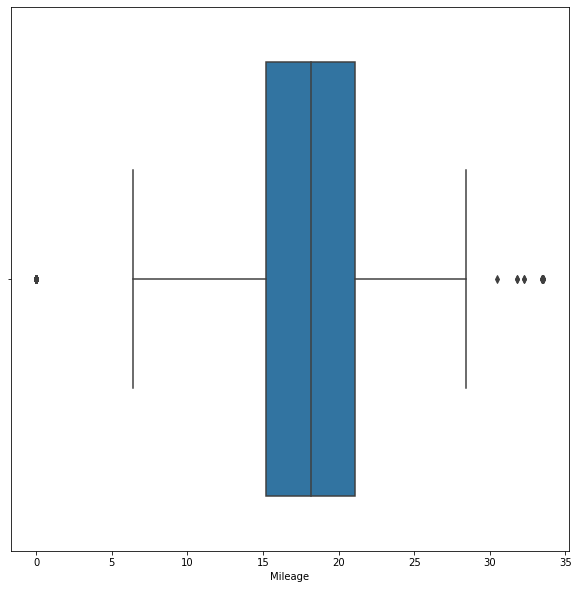

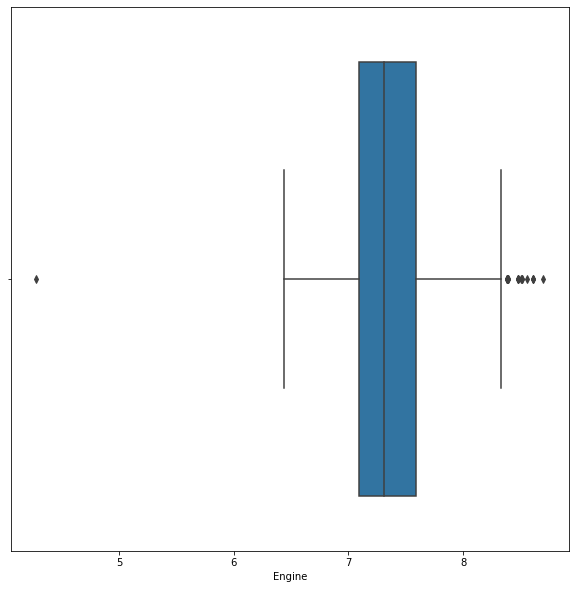

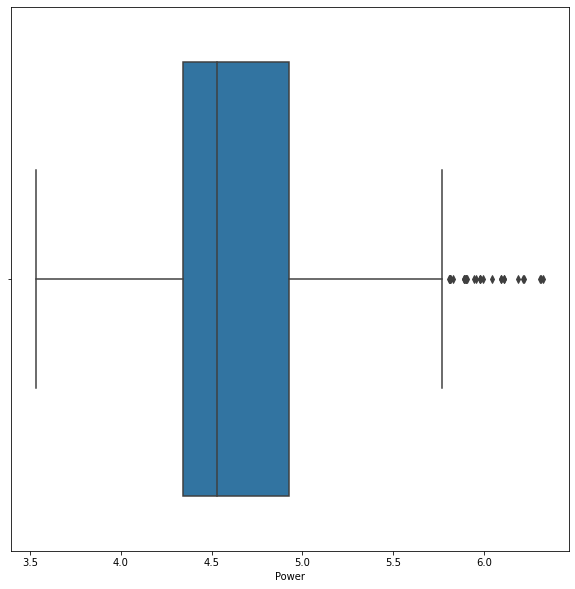

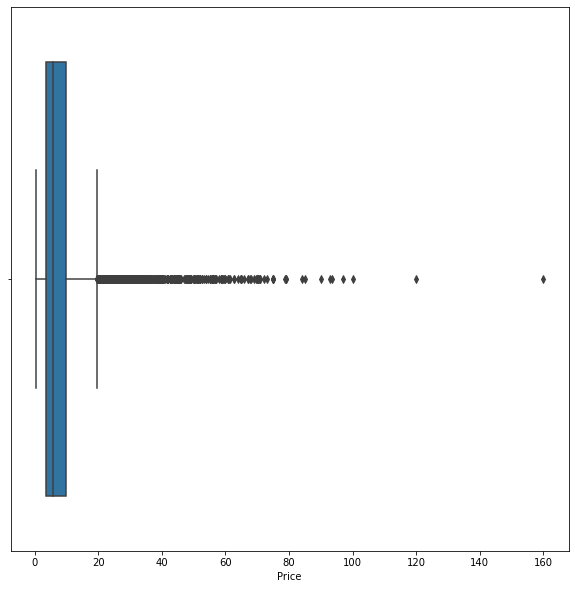

In [31]:
numerical_columns = ["Kilometers_Driven", "Mileage", "Engine", "Power", "Price"]
for i in df[numerical_columns]:
    plt.figure(figsize = (10,10))
    sns.boxplot(df[i])
    plt.show()

In [32]:
df["Kilometers_Driven"] = df["Kilometers_Driven"].clip(lower=df["Kilometers_Driven"].quantile(0.25), upper=df["Kilometers_Driven"].quantile(0.75))
df["Mileage"] = df["Mileage"].clip(lower=df["Mileage"].quantile(0.25), upper=df["Mileage"].quantile(0.75))
df["Engine"] = df["Engine"].clip(lower=df["Engine"].quantile(0.25), upper=df["Engine"].quantile(0.75))
df["Power"] = df["Power"].clip(lower=df["Power"].quantile(0.25), upper=df["Power"].quantile(0.75))
df["Price"] = df["Price"].clip(lower=df["Price"].quantile(0.25), upper=df["Price"].quantile(0.75))

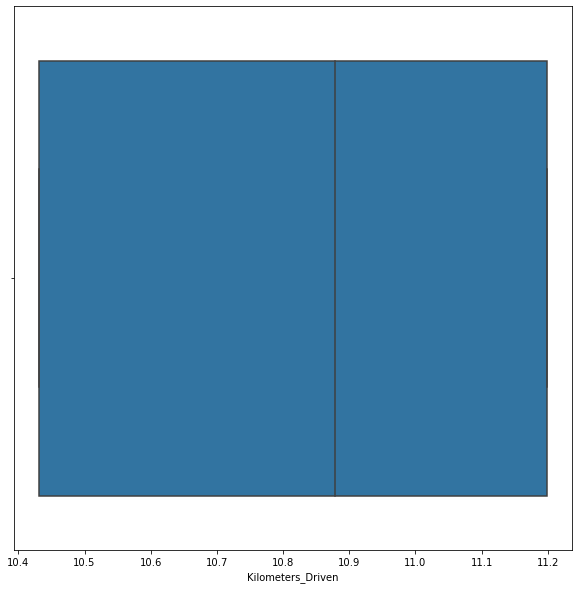

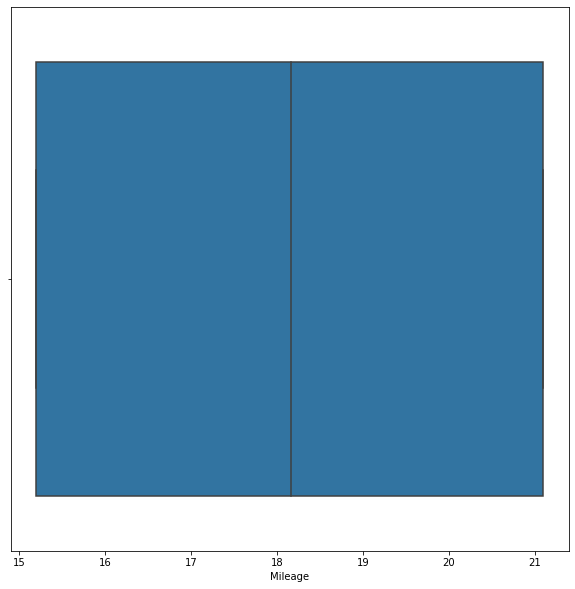

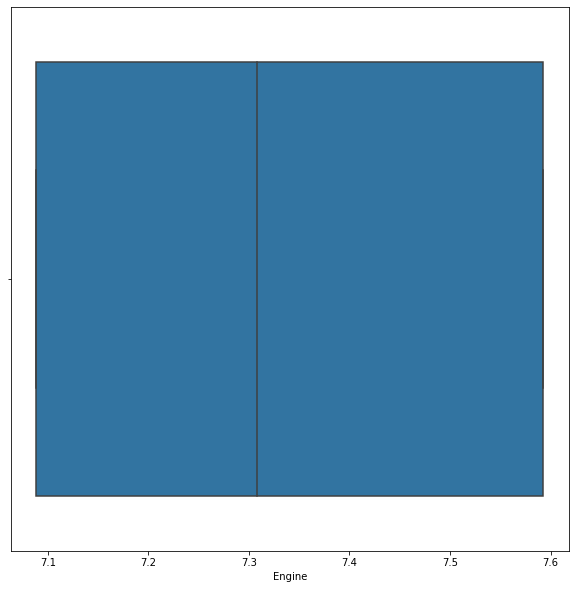

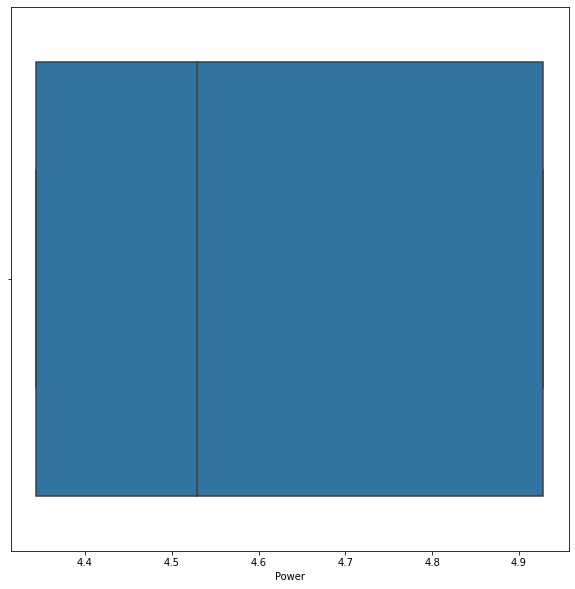

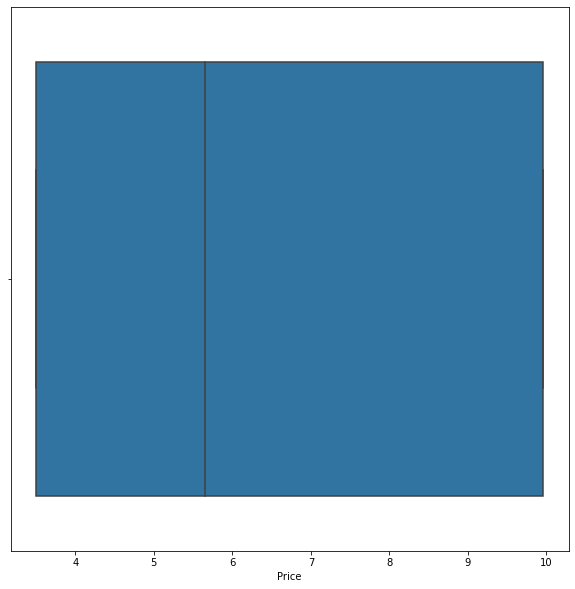

In [33]:
numerical_columns = ["Kilometers_Driven", "Mileage", "Engine", "Power", "Price"]
for i in df[numerical_columns]:
    plt.figure(figsize = (10,10))
    sns.boxplot(df[i])
    plt.show()

# 8. Model Building 

In [34]:
# Splitting the data into X and Y for model building
X = df.drop(columns = {'Name', 'Price'})
Y = df['Price']

In [35]:
# One Hot encoding dummy values for processing as only categorical values can be processed.
X = pd.get_dummies(X, columns=['Location', 'Fuel_Type','Transmission','Owner_Type','Seats'], drop_first=True)

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

In [37]:
# Fitting linear regression line
regression_model = LinearRegression(fit_intercept=True)
regression_model.fit(X_train, Y_train)

LinearRegression()

## R-squared score for training set
- The in-sample R^2 was 66% while the out-of-sample r^2 was 71% prior to dropping the outliers above. 
- After dropping the outliers and consolidating the data to the IQR rane, the in-sample R^2 increased to 76% while the out-of-sample r^2 increased to 77%. 

In [38]:
regression_model.score(X_train, Y_train)

0.7601994340332157

In [39]:
regression_model.score(X_test, Y_test)

0.7705416017293436

## Coefficients for training set

In [40]:
coefficient = pd.DataFrame(list(X_train.columns)).copy()
coefficient.insert(len(coefficient.columns),"Coefs",regression_model.coef_.transpose())

- Negative coefficient shows a weaker correlation while positive coefficient shows a stronger correlation. 

In [42]:
coefficient

,0,Coefs
0,Year,2.468641e-01
1,Kilometers_Driven,-9.156508e-01
2,Mileage,-1.179627e-01
3,Engine,1.178471e+00
4,Power,4.453148e+00
5,Location_Bangalore,7.562835e-02
6,Location_Chennai,-2.124618e-01
7,Location_Coimbatore,3.011324e-01
8,Location_Delhi,-3.749721e-01
9,Location_Hyderabad,1.478399e-01


## RMSE for training set

In [ ]:
np.sqrt(mean_squared_error(y_test,regression_model.predict(X_test)))

## MAE for training set

In [ ]:
(mean_squared_error(y_test,regression_model.predict(X_test)))

In [ ]:
## Another method of gathering R^2, Adjusted R^2, Coefficients, 
X_con=sm.add_constant(X)
X_trainc, X_testc, y_trainc, y_testc = train_test_split(X_con, Y, test_size=0.30 , random_state=1)

In [ ]:
# As noted below, there is a strong multicollinearity problem, implying that further analysis will have to be performed on this data for a smoother fit.
model = sm.OLS(y_trainc,X_trainc).fit()
model.summary()

## Business Insights/Conclusion

In [43]:
coefficient

,0,Coefs
0,Year,2.468641e-01
1,Kilometers_Driven,-9.156508e-01
2,Mileage,-1.179627e-01
3,Engine,1.178471e+00
4,Power,4.453148e+00
5,Location_Bangalore,7.562835e-02
6,Location_Chennai,-2.124618e-01
7,Location_Coimbatore,3.011324e-01
8,Location_Delhi,-3.749721e-01
9,Location_Hyderabad,1.478399e-01


- I was able to fit a linear regression model with an accuracy of 76% and 77% respectively across the training and tesing data by removing outliers and using a log transformation.  
- As year increases, the price of a car also increases, implying that newer cars are more desirable.
- As price increases, the Kilometers_Driven decreases significantly implying that lower mileage cars are more valueable. 
- As price increases, engine output and power output also increase, showing that more powerful cars are desirable. 
- For location, it seems that Bangalore has overpriced cars while Delhi and Mumbai have cheaper cars. 
- Electric cars seem to be priced more fairly relative to cars of other fuel types 
- As price increases, manual transmisson cars decrease significantly, implying that automatic cars are more desirable. 
- Finally, as the number of seats increases, price increases dramatically. Although there is an opposite shift when there are 10 seats. 